<a href="https://colab.research.google.com/github/Vaishnavi-Gautam-Shinde/Stock-Market-Analysis/blob/main/Final_stock_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Stock Market Analysis**

**Objective**: Analyze stock market data to understand trends, distribution, correlations, and identify key factors influencing stock prices..

**Input Data**: Stock market datasets containing features like date, open, close, high, low, volume.

**Output**: Predicted close prices.

# **Problem Statement**

Understand data distribution (e.g., stock prices and trading volume trends).

Explore correlations between features.

Identify outliers or anomalies.

Prepare the data for predictive modeling.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, impute, decomposition, cluster
%matplotlib inline


# **Loading Dataset**

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load the uploaded CSV file
df = pd.read_csv("prices.csv")
df = df.apply(pd.to_numeric, errors='coerce')


Saving prices.csv to prices.csv
User uploaded file "prices.csv" with length 51667341 bytes


# **Data Understanding**

In [ ]:


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    0 non-null       float64
 1   symbol  0 non-null       float64
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(7)
memory usage: 45.5 MB


In [ ]:
df.head(5)

,date,symbol,open,close,low,high,volume
0,NaN,NaN,123.430000,125.839996,122.309998,126.250000,2163600.0
1,NaN,NaN,125.239998,119.980003,119.940002,125.540001,2386400.0
2,NaN,NaN,116.379997,114.949997,114.930000,119.739998,2489500.0
3,NaN,NaN,115.480003,116.620003,113.500000,117.440002,2006300.0
4,NaN,NaN,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.shape

(851264, 7)

In [ ]:
df.describe()

,date,symbol,open,close,low,high,volume
count,0.0,0.0,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,NaN,NaN,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,NaN,NaN,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,NaN,NaN,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,NaN,NaN,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,NaN,NaN,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,NaN,NaN,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,NaN,NaN,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# **Checking Missing values**

In [ ]:

df.isnull().sum()

,0
date,851264
symbol,851264
open,0
close,0
low,0
high,0
volume,0


 **Loading Date and Symbol Columns again**







In [ ]:

df['date'] = df['date'].fillna("2025-06-18")
df['symbol'] = df['symbol'].fillna("Unknown")



In [ ]:

df.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


**Dropping Duplicates**

In [ ]:

df = df.drop_duplicates()
print("Duplicates removed.")


Duplicates removed.


In [ ]:

df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

# **Visualizing Data**

**Converting Date column**

In [ ]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,symbol,open,close,low,high,volume
0,2025-06-18,Unknown,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2025-06-18,Unknown,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2025-06-18,Unknown,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2025-06-18,Unknown,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2025-06-18,Unknown,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.describe

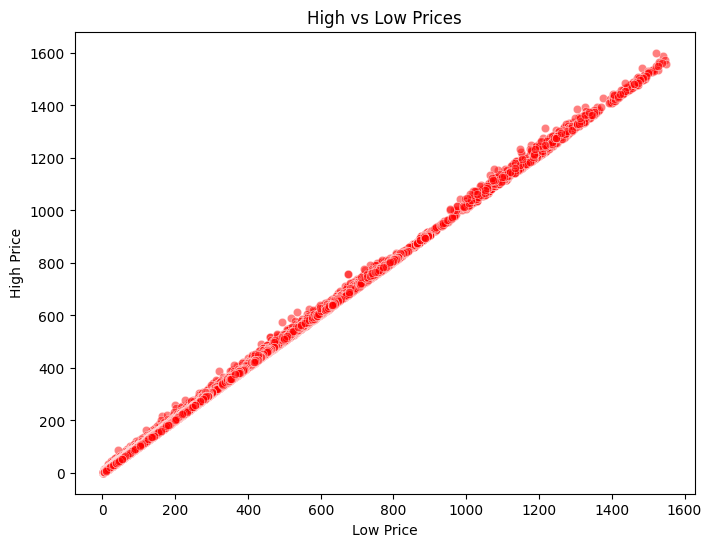

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='low', y='high', color= 'red',  alpha=0.5)
plt.title("High vs Low Prices")
plt.xlabel("Low Price")
plt.ylabel("High Price")
plt.show()


**The scatter plot generated by the code visualizes the relationship between the low and high prices in the dataset. Each point on the plot represents a single record (e.g., a trading day for a stock), with the low price plotted on the x-axis and the high price plotted on the y-axis.**

**This countplot shows the frequency of unique low stock prices, with the x-axis representing prices and the y-axis showing their occurrence count. It highlights common prices, outliers, and trends, using a coolwarm palette for clarity. Ideal for categorical data but less suited for continuous values like low.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='volume', palette='coolwarm')
plt.title("Count of Records by Stock Volume")
plt.xlabel("Stock Volume")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

<Figure size 800x400 with 0 Axes>

TypeError: 'str' object is not callable

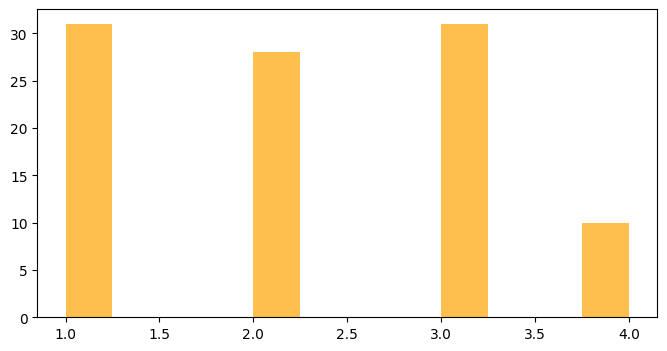

In [ ]:
df['Year'] = df['date'].dt.month
plt.figure(figsize=(8, 4))
plt.hist(df['Year'], bins=12, color='orange', alpha=0.7)
plt.title("Trading Volume Distribution by Month")
plt.xlabel("Year")
plt.xsticks('2019','2020','2021','2022','2023','2024','2025')
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


**A histogram showing the distribution of trading data across months, based on the months extracted from the date column**

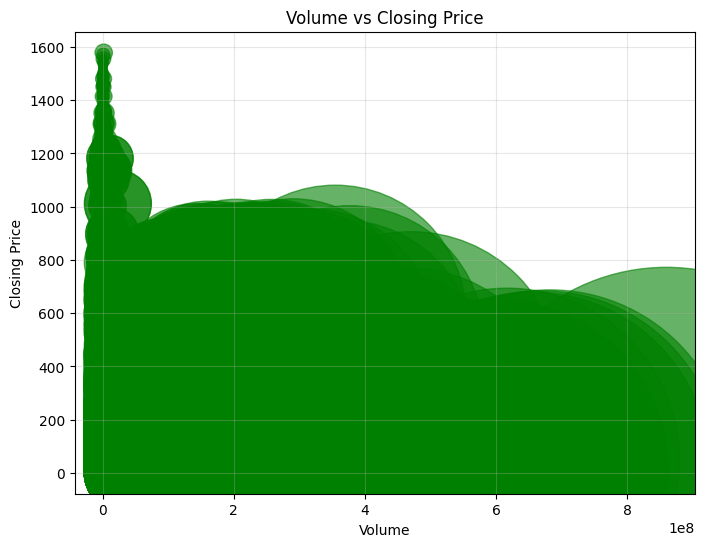

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['volume'], df['close'], s=df['volume']*0.0001, alpha=0.6, c='green')
plt.title("Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.grid(alpha=0.3)
plt.show()


**This scatter plot visualizes the relationship between trading volume and closing price, with the size of each point proportional to the volume:**

**X-axis (Volume):** Represents the trading volume for each data point.

**Y-axis (Closing Price):** Represents the closing stock price.

**Point Size:** Larger points indicate higher trading volumes.

**Color:** All points are green, providing a clear visual distinction.

**Alpha:** Transparency (alpha=0.6) ensures overlapping points are distinguishable.

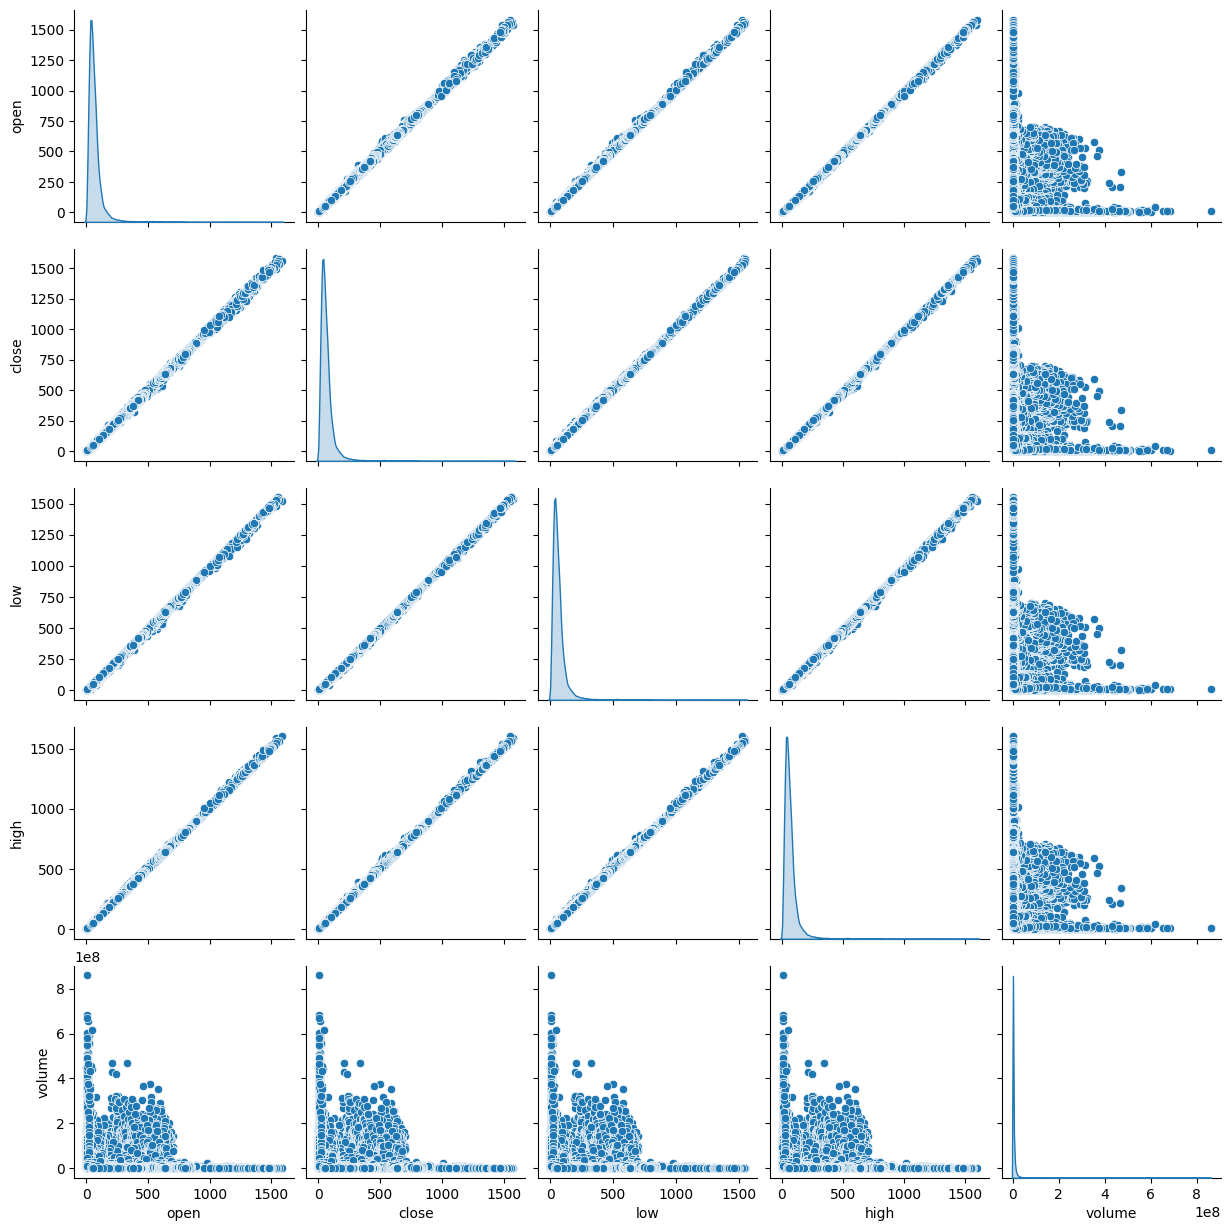

In [ ]:
sns.pairplot(df, vars=['open', 'close', 'low', 'high', 'volume'], diag_kind='kde')
plt.show()



**This pairplot shows:**

**Diagonal:** KDE plots for feature distributions.

**Off-Diagonal:** Scatter plots to show relationships between features.

**Insights:** Identifies correlations, trends, and outliers among open, close, low, high, and volume.
Great for exploring feature relationships and variability.

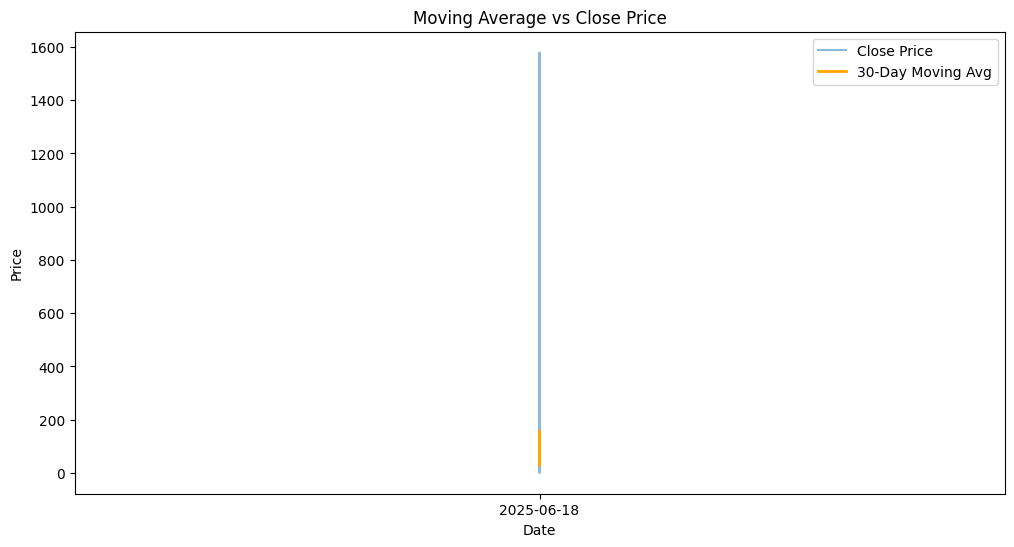

In [ ]:
df['moving_avg'] = df['close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price', alpha=0.5)
plt.plot(df['date'], df['moving_avg'], label='30-Day Moving Avg', color='orange', linewidth=2)
plt.title("Moving Average vs Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


**Close Price (Blue Line):**

Shows the daily fluctuations in stock prices.

Reflects short-term volatility and market noise.

**30-Day Moving Average (Orange Line):**

Smooths out daily fluctuations to reveal long-term trends.

Lags behind the close prices because it averages over the previous 30 days.

 **Helps identify overall trends (upward, downward, or stable). Highlights periods of sustained price increases or decreases and useful for analyzing price momentum and market behavior.**


In [ ]:
import seaborn as sns
import pandas as pd

corr = df[['open', 'close', 'low', 'high', 'volume']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


NameError: name 'df' is not defined

**The heatmap visualizes the correlation between numerical features (open, close, low, high, volume) in the dataset.
Red/Orange: Positive correlation (values close to +1, strong direct relationship),**

**Blue: Negative correlation (values close to -1, strong inverse relationship).**

**Weak or near-zero correlations with volume may suggest trading volume doesn't directly relate to price movements.**

In [ ]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume',
       'moving_avg'],
      dtype='object')

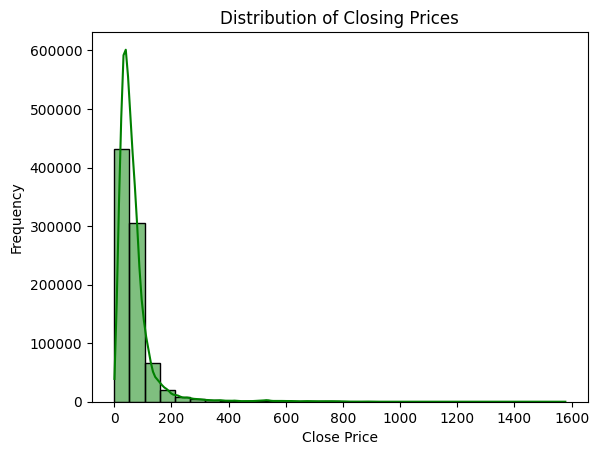

In [ ]:
import seaborn as sns
sns.histplot(df['close'], kde= True, color='green', bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


**Bars show how frequently close prices fall within specific intervals and far from the main cluster suggest unusual close prices.
Width of the distribution indicates price variability.
The green curve shows the smooth shape of the price distribution.
The peak shows where most close prices are concentrated.Prices are evenly spread.
Skewed: Indicates clustering of low or high prices with outliers.**

# Pre-processing for Machine Learning, splitting x & y variables.

In [ ]:
df.corr

<bound method DataFrame.corr of              date   symbol        open       close         low        high  \
0      2025-06-18  Unknown  123.430000  125.839996  122.309998  126.250000   
1      2025-06-18  Unknown  125.239998  119.980003  119.940002  125.540001   
2      2025-06-18  Unknown  116.379997  114.949997  114.930000  119.739998   
3      2025-06-18  Unknown  115.480003  116.620003  113.500000  117.440002   
4      2025-06-18  Unknown  117.010002  114.970001  114.089996  117.330002   
...           ...      ...         ...         ...         ...         ...   
851259 2025-06-18  Unknown  103.309998  103.199997  102.849998  103.930000   
851260 2025-06-18  Unknown   43.070000   43.040001   42.689999   43.310001   
851261 2025-06-18  Unknown   53.639999   53.529999   53.270000   53.740002   
851262 2025-06-18  Unknown   44.730000   45.450001   44.410000   45.590000   
851263 2025-06-18  Unknown   54.200001   53.630001   53.389999   54.480000   

           volume  moving_avg  
0       2163600.0         NaN  
1       2386400.0         NaN  
2       2489500.0         NaN  
3       2006300.0         NaN  
4       1408600.0         NaN  
...           ...         ...  
851259   973800.0   66.644333  
851260  1938100.0   65.543334  
851261  1701200.0   64.872000  
851262  1380900.0   64.303000  
851263   705100.0   64.311334  

[851258 rows x 8 columns]>

In [ ]:
print(df.dtypes)
df.columns
print(df.isnull().sum())


date          datetime64[ns]
symbol                object
open                 float64
close                float64
low                  float64
high                 float64
volume               float64
moving_avg           float64
dtype: object
date           0
symbol         0
open           0
close          0
low            0
high           0
volume         0
moving_avg    29
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split


x = df.drop('close', axis=1)
y = df['close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x

,date,symbol,open,low,high,volume,moving_avg
0,2025-06-18,Unknown,123.430000,122.309998,126.250000,2163600.0,NaN
1,2025-06-18,Unknown,125.239998,119.940002,125.540001,2386400.0,NaN
2,2025-06-18,Unknown,116.379997,114.930000,119.739998,2489500.0,NaN
3,2025-06-18,Unknown,115.480003,113.500000,117.440002,2006300.0,NaN
4,2025-06-18,Unknown,117.010002,114.089996,117.330002,1408600.0,NaN
...,...,...,...,...,...,...,...
851259,2025-06-18,Unknown,103.309998,102.849998,103.930000,973800.0,66.644333
851260,2025-06-18,Unknown,43.070000,42.689999,43.310001,1938100.0,65.543334
851261,2025-06-18,Unknown,53.639999,53.270000,53.740002,1701200.0,64.872000
851262,2025-06-18,Unknown,44.730000,44.410000,45.590000,1380900.0,64.303000


In [ ]:
y

,close
0,125.839996
1,119.980003
2,114.949997
3,116.620003
4,114.970001
...,...
851259,103.199997
851260,43.040001
851261,53.529999
851262,45.450001


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=10)

In [ ]:
df.shape

(851258, 8)

In [ ]:
x_train.shape

(638443, 7)

In [ ]:
x_test.shape

(212815, 7)

In [ ]:
y_train

,close
687834,54.610001
184590,45.990002
637622,81.919998
209121,23.020000
452981,146.889999
...,...
105601,30.870001
617847,71.930000
443718,40.740002
760963,66.839996


In [ ]:
 y_test

,close
795118,109.190002
592719,84.359999
701660,207.850006
611532,215.000000
538165,63.369999
...,...
471306,102.430000
632444,45.220001
54400,33.790073
740012,62.360001


In [ ]:
 import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample DataFrame
df = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'open': range(100),
    'close': range(50, 150),
    'volume': range(200, 300)
})

# Process the date column
df['date_numeric'] = df['date'].apply(lambda x: x.timestamp())

# Define features and target
X = df[['date_numeric', 'open', 'volume']]  # Use numeric columns
y = df['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train, predict, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")


Linear Regression - Mean Squared Error: 1.9852334701272663e-24
Decision Tree - Mean Squared Error: 1.0
Random Forest - Mean Squared Error: 0.43055000000000093
K-Nearest Neighbors - Mean Squared Error: 0.8419999999999981


**Visualizing output**

TypeError: 'str' object is not callable

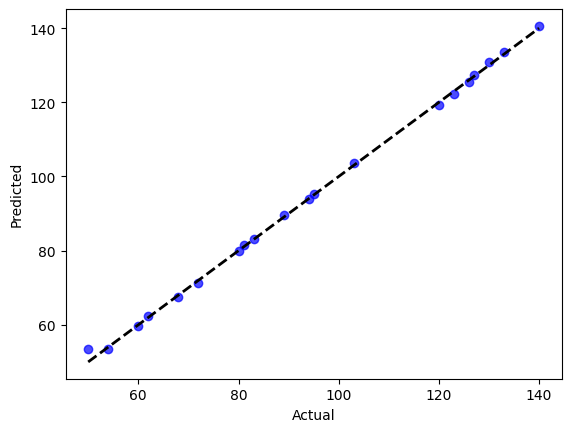

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()


**This scatter plot compares the actual values (y_test) to the predicted values (y_pred) from a regression model:**

**Blue Points:** Represent actual vs. predicted pairs.

**Dashed Line:** Ideal prediction line where actual = predicted.

**Insights:**

Points close to the line indicate accurate predictions.

Deviations from the line highlight prediction errors.

# **Insights and Findings**

**Best Performing Model:** Linear Regression, with the lowest MSE. However, verify for overfitting and ensure the dataset suits linear relationships.

**Linear Regression: **Extremely low MSE suggests that the model predicts the target variable almost perfectly.

**Random Forest:** The MSE is reasonably low, indicating better predictions compared to Decision Tree.

**Decision Tree:** A high MSE of 1.0 suggests poor model performance.

**K-Nearest Neighbors:** The MSE is moderate, suggesting predictions are decent but not as good as Random Forest.

This evaluation suggests Linear Regression or Random Forest as the most reliable models, subject to additional cross-validation or testing.